# Tobacco Plant Disease Prediction

## Importing libraries

In [1]:
# Importing the TensorFlow library for machine learning tasks.
import tensorflow as tf
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the Pandas library for data manipulation and analysis.
import pandas as pd
# Importing the Seaborn library for statistical data visualization.
import seaborn as sns
# Importing the os module for interacting with the operating system.
import os  
# Importing the random module for generating random numbers.
import random  
# Importing the time module for time-related operations.
import time  
# Redundant import of TensorFlow.
import tensorflow as tf  
# Importing a function for plotting Keras models.
from tensorflow.keras.utils import plot_model  
# Redundant import of TensorFlow.
import tensorflow as tf  
# Importing the Support Vector Classifier from Scikit-learn.
from sklearn.svm import SVC

## Data Collection And Preprocessing

### Training Data Dataset - Data Collection and Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1692 files belonging to 5 classes.


In [3]:
# Get the input path for the training set
input_path = training_set.file_paths

# Get the class names
class_names = training_set.class_names

# Count the number of images in each class
class_counts = {}
for class_name in class_names:
    class_path = os.path.join('train', class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

total_images = 0
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")
    total_images += count

print(f"Total images: {total_images}")



Class 'Tobacco___AlternariaLeafSpot_Virus': 339 images
Class 'Tobacco___Black_Shack': 339 images
Class 'Tobacco___Healthy': 339 images
Class 'Tobacco___Mosaic_Virus': 339 images
Class 'Tobacco___Potato_Virus': 336 images
Total images: 1692


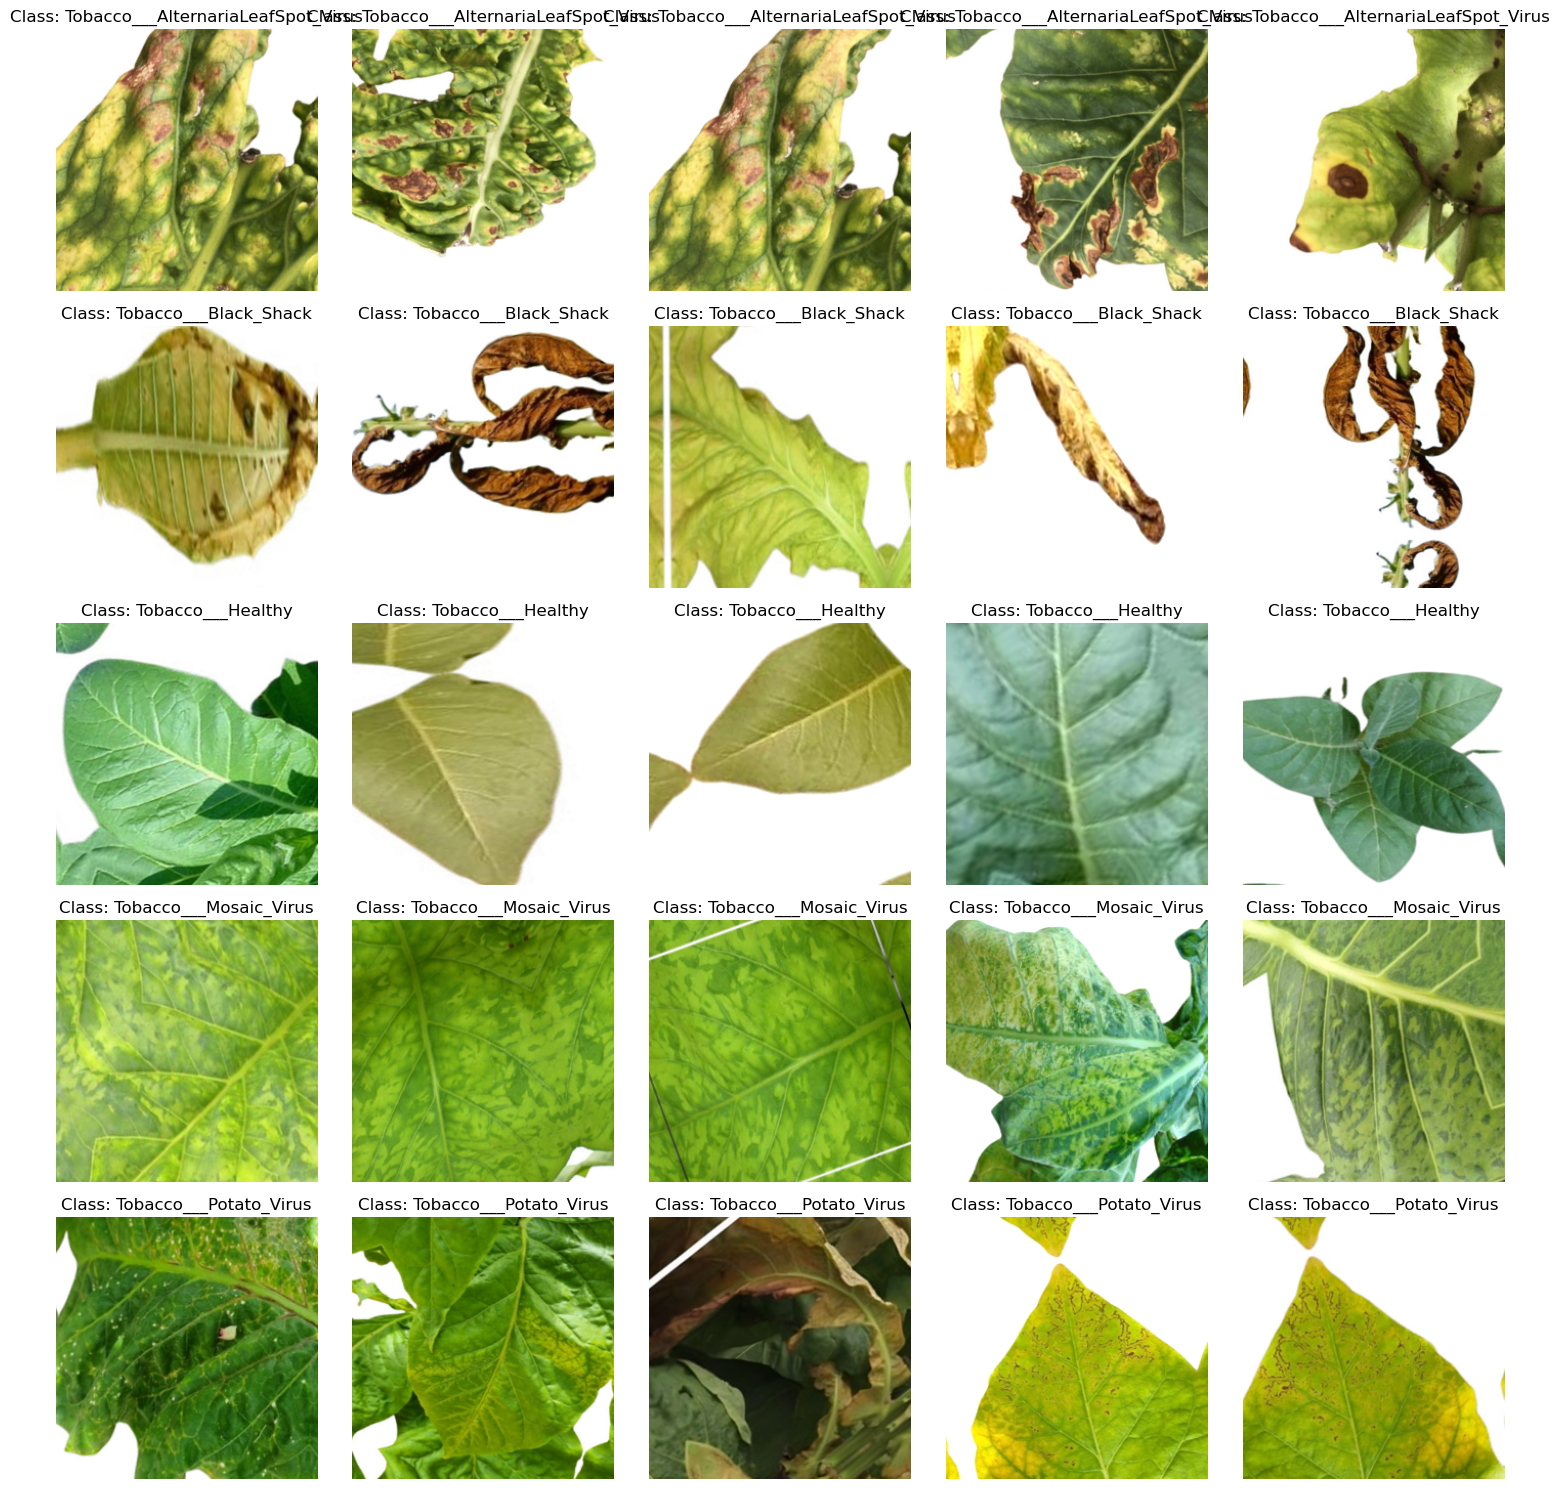

In [4]:


# Get the input path for the training set
input_path = training_set.file_paths

# Get the class names
class_names = training_set.class_names

# Display 5 images of each class
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i, class_name in enumerate(class_names):
    class_path = os.path.join('train', class_name)
    class_images = os.listdir(class_path)
    sample_images = random.sample(class_images, 5)
    
    for j, image_name in enumerate(sample_images):
        image_path = os.path.join(class_path, image_name)
        image = plt.imread(image_path)
        axes[i, j].imshow(image)
        axes[i, j].set_title(f"Class: {class_name}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

### Validation DataSet - Data Collection and PreProcessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 450 files belonging to 5 classes.


In [6]:
# Get the input path for the training set
input_path = training_set.file_paths

# Get the class names
class_names = training_set.class_names

# Count the number of images in each class
class_counts = {}
for class_name in class_names:
    class_path = os.path.join('valid', class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

# Print the class counts
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")
    total_images += count


Class 'Tobacco___AlternariaLeafSpot_Virus': 90 images
Class 'Tobacco___Black_Shack': 90 images
Class 'Tobacco___Healthy': 90 images
Class 'Tobacco___Mosaic_Virus': 90 images
Class 'Tobacco___Potato_Virus': 90 images


## Building Model

### Building Convolution Layer - ALGORITHM ARCHITECTURE

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

In [9]:
# Create a sequential model
cnn = tf.keras.Sequential([
    cnn,  # Adding the existing 'cnn' model as a layer within the new sequential model.
    tf.keras.layers.Flatten(),  # Adding a Flatten layer to convert the multidimensional tensor to a 1D tensor.
    tf.keras.layers.Dense(units=5, activation='softmax', name='output')  # Adding a Dense layer with 5 units and softmax activation for the output.
])

In [10]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    decay=0.0005,
    amsgrad=False),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [11]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1500)              7785724   
                                                                 
 flatten_1 (Flatten)         (None, 1500)              0         
                                                                 
 output (Dense)              (None, 5)                 7505      
                                                                 
Total params: 7793229 (29.73 MB)
Trainable params: 7793229 (29.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling and Training Phase

## Hyperparameter Tuning

In [12]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor for early stopping
    patience=3,           # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [13]:


start_time = time.time()
# Fit the model with early stopping
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=15,
    callbacks=[early_stopping]  # Pass the early stopping callback
)
end_time = time.time()

total_time = end_time - start_time
training_time_minutes = total_time / 60

print(f"Total training time: {training_time_minutes:.2f} minutes")

Epoch 1/15


53/53 [==============================] - 121s 2s/step - loss: 1.3877 - accuracy: 0.3806 - val_loss: 1.0232 - val_accuracy: 0.6200
Epoch 2/15
53/53 [==============================] - 119s 2s/step - loss: 1.0199 - accuracy: 0.5597 - val_loss: 1.1706 - val_accuracy: 0.5111
Epoch 3/15
53/53 [==============================] - 109s 2s/step - loss: 0.9348 - accuracy: 0.5928 - val_loss: 0.7906 - val_accuracy: 0.6956
Epoch 4/15
53/53 [==============================] - 107s 2s/step - loss: 0.7785 - accuracy: 0.6584 - val_loss: 0.7639 - val_accuracy: 0.6622
Epoch 5/15
53/53 [==============================] - 108s 2s/step - loss: 0.6869 - accuracy: 0.7199 - val_loss: 0.6923 - val_accuracy: 0.6867
Epoch 6/15
53/53 [==============================] - 110s 2s/step - loss: 0.6116 - accuracy: 0.7394 - val_loss: 0.9045 - val_accuracy: 0.6267
Epoch 7/15
53/53 [==============================] - 111s 2s/step - loss: 0.5550 - accuracy: 0.7778 - val_loss: 0.8544 - val_accuracy: 0.6733
Epoch 8/15


## LOSS GRADIENT

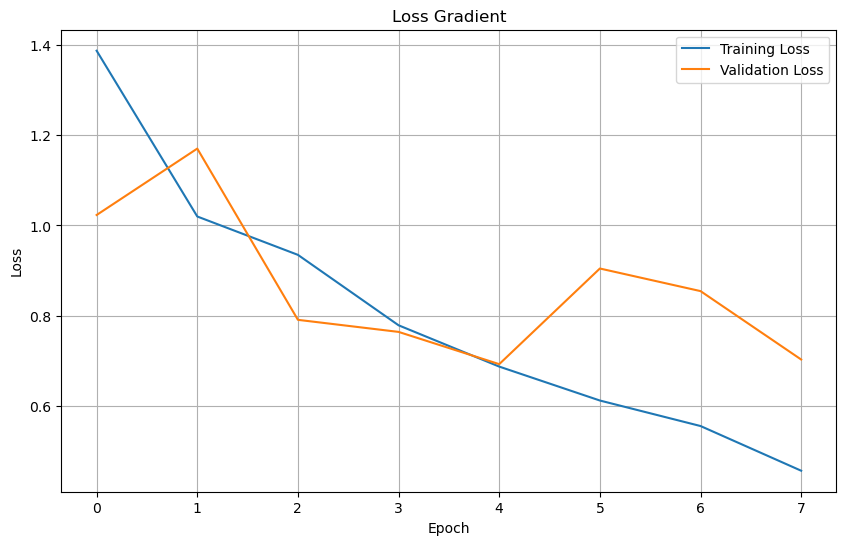

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Gradient')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating Model

In [15]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

53/53 [==============================] - 30s 511ms/step - loss: 0.5167 - accuracy: 0.7849
Training accuracy: 0.7848699688911438


In [16]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

15/15 [==============================] - 7s 445ms/step - loss: 0.6923 - accuracy: 0.6867
Validation accuracy: 0.6866666674613953


### Saving Model

In [17]:
cnn.save('trained_plant_disease_model.keras')

In [18]:
training_history.history #Return Dictionary of history

{'loss': [1.387744426727295,
  1.0199222564697266,
  0.9347924590110779,
  0.7785283923149109,
  0.6868917942047119,
  0.6116036772727966,
  0.555000364780426,
  0.4558408856391907],
 'accuracy': [0.38061466813087463,
  0.5596926808357239,
  0.5927895903587341,
  0.6583924293518066,
  0.7198581695556641,
  0.7393617033958435,
  0.7777777910232544,
  0.8238770961761475],
 'val_loss': [1.023247241973877,
  1.1705862283706665,
  0.7906289100646973,
  0.7638643980026245,
  0.6923108696937561,
  0.904517412185669,
  0.8543791174888611,
  0.7025669813156128],
 'val_accuracy': [0.6200000047683716,
  0.5111111402511597,
  0.695555567741394,
  0.6622222065925598,
  0.6866666674613953,
  0.6266666650772095,
  0.6733333468437195,
  0.6577777862548828]}

In [19]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [20]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

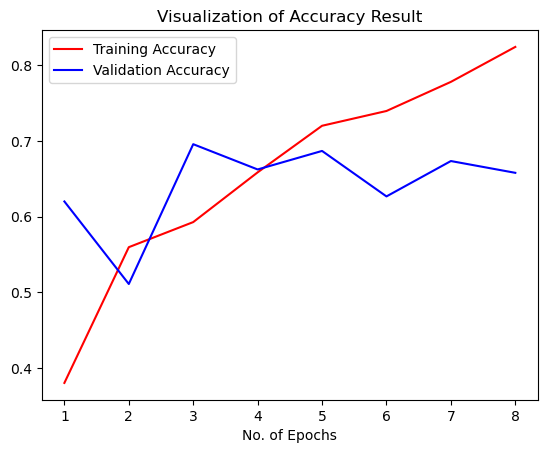

In [21]:
epochs = range(1, len(training_history.history['accuracy']) + 1)

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [22]:
class_name = validation_set.class_names

In [23]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 450 files belonging to 5 classes.


In [24]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

450/450 [==============================] - 19s 38ms/step


In [25]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [26]:
Y_true

<tf.Tensor: shape=(450,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
     

In [27]:
predicted_categories

<tf.Tensor: shape=(450,), dtype=int64, numpy=
array([4, 4, 4, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 4, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2,
     

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [29]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                    precision    recall  f1-score   support

Tobacco___AlternariaLeafSpot_Virus       0.73      0.77      0.75        90
             Tobacco___Black_Shack       0.91      1.00      0.95        90
                 Tobacco___Healthy       0.52      0.60      0.56        90
            Tobacco___Mosaic_Virus       0.43      0.37      0.40        90
            Tobacco___Potato_Virus       0.83      0.70      0.76        90

                          accuracy                           0.69       450
                         macro avg       0.68      0.69      0.68       450
                      weighted avg       0.68      0.69      0.68       450



## VISUALISING PRECISION METRICS

In [30]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report


In [31]:
class_names = validation_set.class_names

In [32]:
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)

In [33]:
precisions = [report[class_name]['precision'] for class_name in class_names]

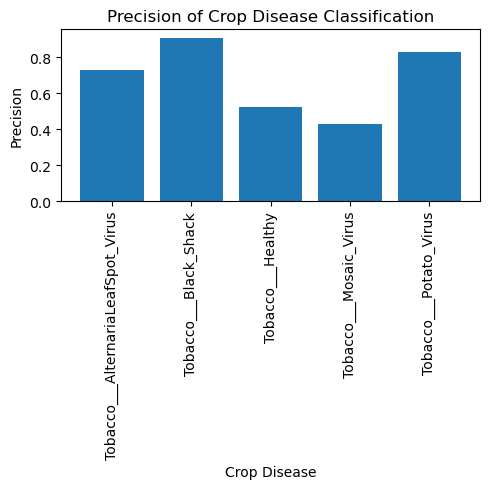

In [34]:
plt.figure(figsize=(5, 5))
plt.bar(class_names, precisions)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('Precision')
plt.title('Precision of Crop Disease Classification')
plt.tight_layout()
plt.show()

## VISUALISING RECALL METRICS

In [35]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report

In [36]:
class_names = validation_set.class_names

In [37]:
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)

In [38]:
recalls = [report[class_name]['recall'] for class_name in class_names]

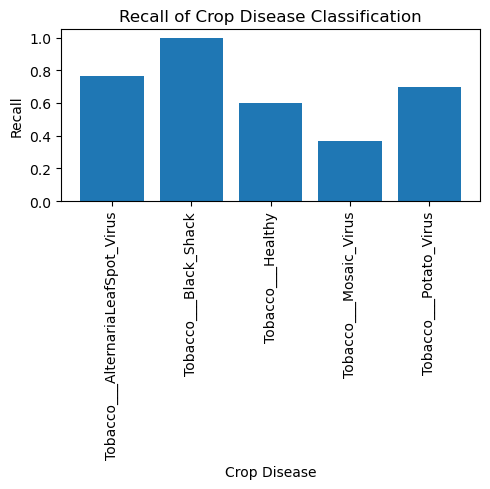

In [39]:
plt.figure(figsize=(5, 5))
plt.bar(class_names, recalls)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('Recall')
plt.title('Recall of Crop Disease Classification')
plt.tight_layout()
plt.show()

## VISUALISING F1-SCORE METRICS

In [40]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report

In [41]:
class_names = validation_set.class_names

In [42]:
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)

In [43]:
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

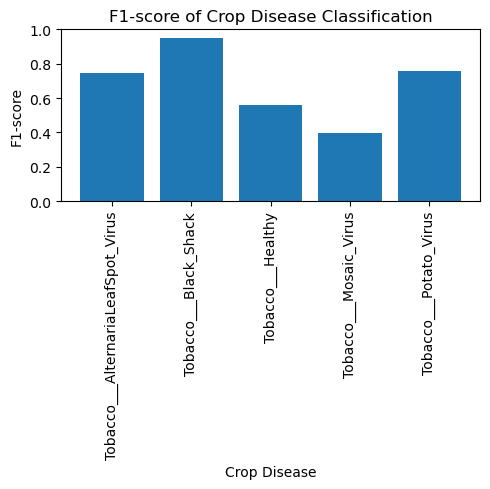

In [44]:
plt.figure(figsize=(5, 5))
plt.bar(class_names, f1_scores)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('F1-score')
plt.title('F1-score of Crop Disease Classification')
plt.tight_layout()
plt.show()

## SUPPORT VISUALISATION 

In [45]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report

In [46]:
class_names = validation_set.class_names

In [47]:
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)

In [48]:
supports = [report[class_name]['support'] for class_name in class_names]

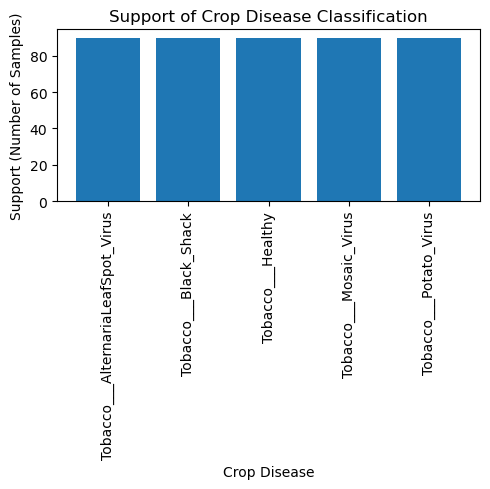

In [49]:
plt.figure(figsize=(5, 5))
plt.bar(class_names, supports)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('Support (Number of Samples)')
plt.title('Support of Crop Disease Classification')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

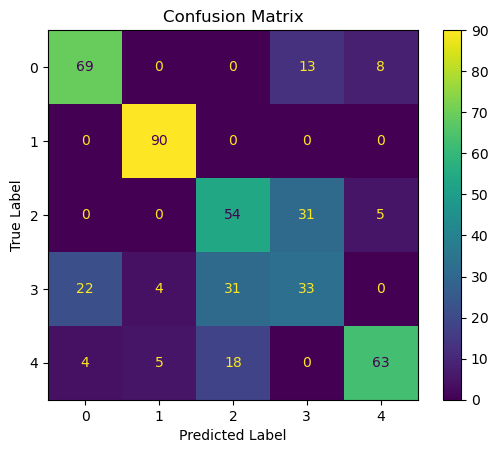

In [50]:
# Importing the confusion_matrix and ConfusionMatrixDisplay functions from Scikit-learn.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt

# Get the true labels and the predicted labels

# Create a confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Create a figure and display the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## PLOT MODEL ARCHITECTURE

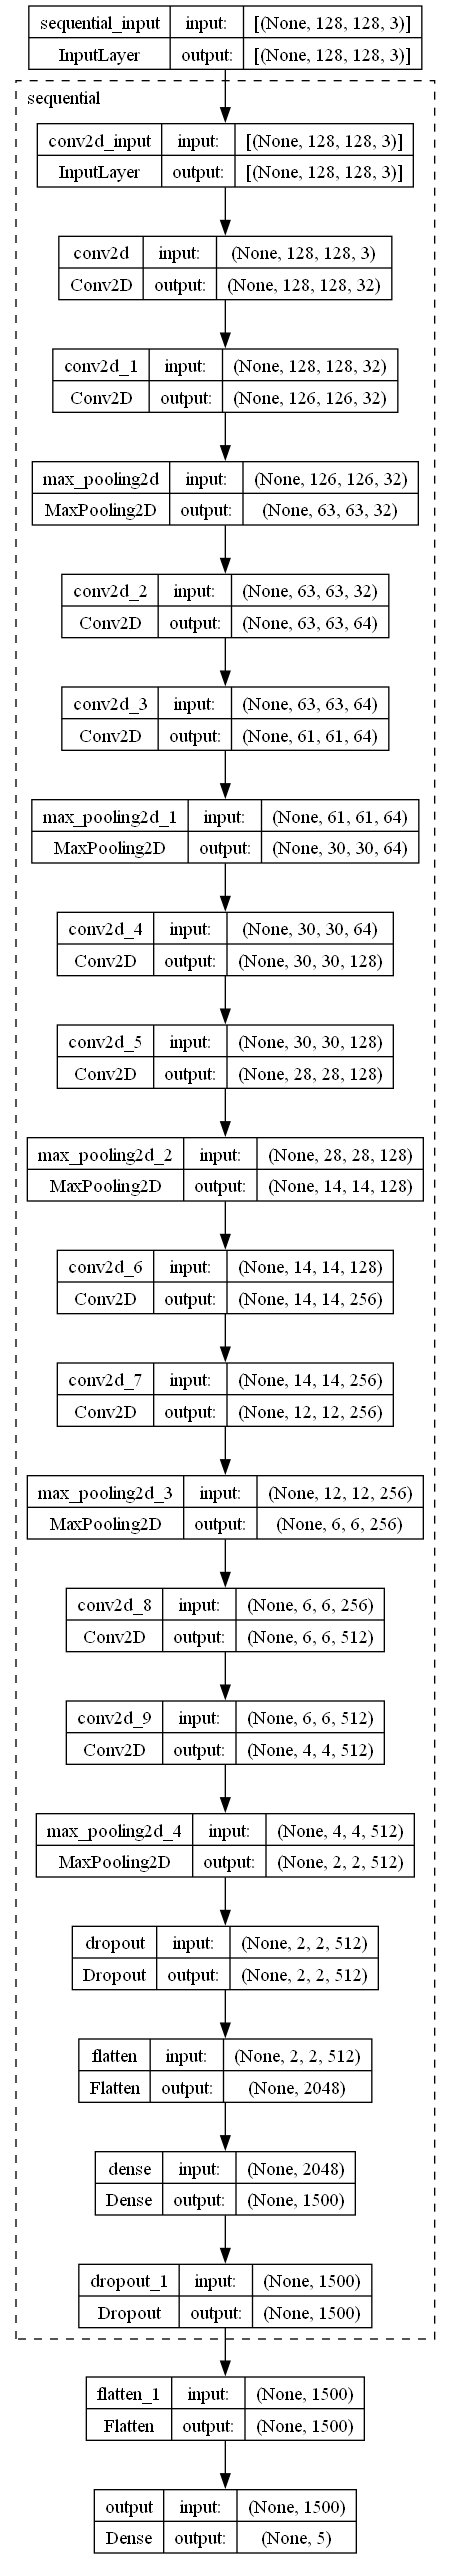

In [51]:
plot_model(cnn, show_shapes=True, show_layer_names=True, expand_nested=True)

## PLOT MODEL ARCHITECTURE

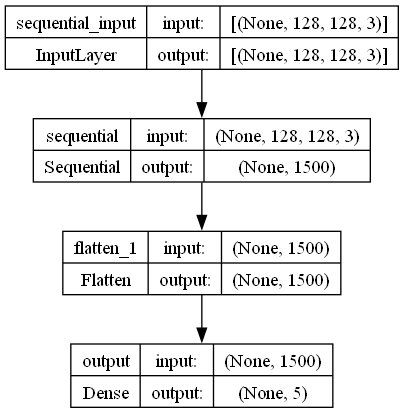

In [52]:
plot_model(cnn, to_file='model_architecture.png', show_shapes=True)